### Evaluation Project - 2

# Avocado Project

### Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

### Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold


### Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

### Downlaod Files:

    https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

## Lets being by importing all required liabraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### Converting data to dataframe

In [2]:
# Checking some sample data by viewing head and tail of our dataset

Avocado = pd.read_csv ('avocado.csv')
Avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
Avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
Avocado.shape

(18249, 14)

#### Observations:
1. There are 18249 - Rows and 14 - Columns in our data. Now Further need to check what type of information is in our data.
2. There is one unamed column which is not required and can be removed along with date.
3. There are 3 categorical coulumns.
4. We will check some addtional information of our data.

In [5]:
# Checking additional data of our dataset

Avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### Lets being with Data PreProcessing

In [6]:
# Removing unnamed column which is not required

Avocado_new = Avocado.drop (['Unnamed: 0','Date'], axis = 1)
Avocado_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
# Updating column names
Avocado_new = Avocado_new.rename({'Total Volume':'Total_Volume', 'Total Bags':'Total_Bags', 'Small Bags':'Small_Bags',
                                 'Large Bags':'Large_Bags', 'XLarge Bags':'XLarge_Bags', '4046' :'A_4046', '4225':'B_4225', '4770':'C_4770'}, axis = 1)

### Checking if our data has any null values

In [8]:
Avocado_new.isnull().sum()

AveragePrice    0
Total_Volume    0
A_4046          0
B_4225          0
C_4770          0
Total_Bags      0
Small_Bags      0
Large_Bags      0
XLarge_Bags     0
type            0
year            0
region          0
dtype: int64

#### Observations
1. Out data is no null values
2. We have removed unnamed coulumn which is further not required
3. For more detail of our data we will check some statistical information

In [9]:
Avocado_new.describe()

,AveragePrice,Total_Volume,A_4046,B_4225,C_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
Avocado_new.nunique()

AveragePrice      259
Total_Volume    18237
A_4046          17702
B_4225          18103
C_4770          12071
Total_Bags      18097
Small_Bags      17321
Large_Bags      15082
XLarge_Bags      5588
type                2
year                4
region             54
dtype: int64

### Now checking common values of our catergorical columns

In [11]:
print('-'*35)
print (Avocado_new.region.value_counts())
print('-'*35)
print (Avocado_new.year.value_counts())
print('-'*35)
print (Avocado_new.type.value_counts())
print('-'*35)

-----------------------------------
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte          

### Observation
1. region column have most number common items in it.
2. Further need to replace these with numbers using encoding technique
3. By using LabelEncoder all common item in our column with get replaced by unique number.
4. First region will be encoded by LabelEncoder and then year and type by replace method.
5. As other categorical data are short so will replace manually.

In [12]:
# Importing LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [13]:
lab_enc = LabelEncoder()

In [14]:
region = lab_enc.fit_transform(Avocado_new ['region'] )
pd.Series(region)

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Length: 18249, dtype: int32

In [15]:
# Replacing item in year and type column by numbers

Avocado_new.replace({'year':{2015:0,2016:1,2017:2,2018:3}},inplace = True)
Avocado_new.replace({'type':{'conventional':0, 'organic':1}},inplace = True)

In [16]:
Avocado_new['region'] = region
Avocado_new.head

<bound method NDFrame.head of        AveragePrice  Total_Volume   A_4046     B_4225  C_4770  Total_Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small_Bags  Large_Bags  XLarge_Bags  t

After all correction and removing not required data need to check how our statistical data looks

In [17]:
Avocado_new.describe()

,AveragePrice,Total_Volume,A_4046,B_4225,C_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,1.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,0.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,1.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,3.000000,53.000000


### DATA PREPROCESSING & EDA - EXPOLARTORY DATA ANALYSIS)

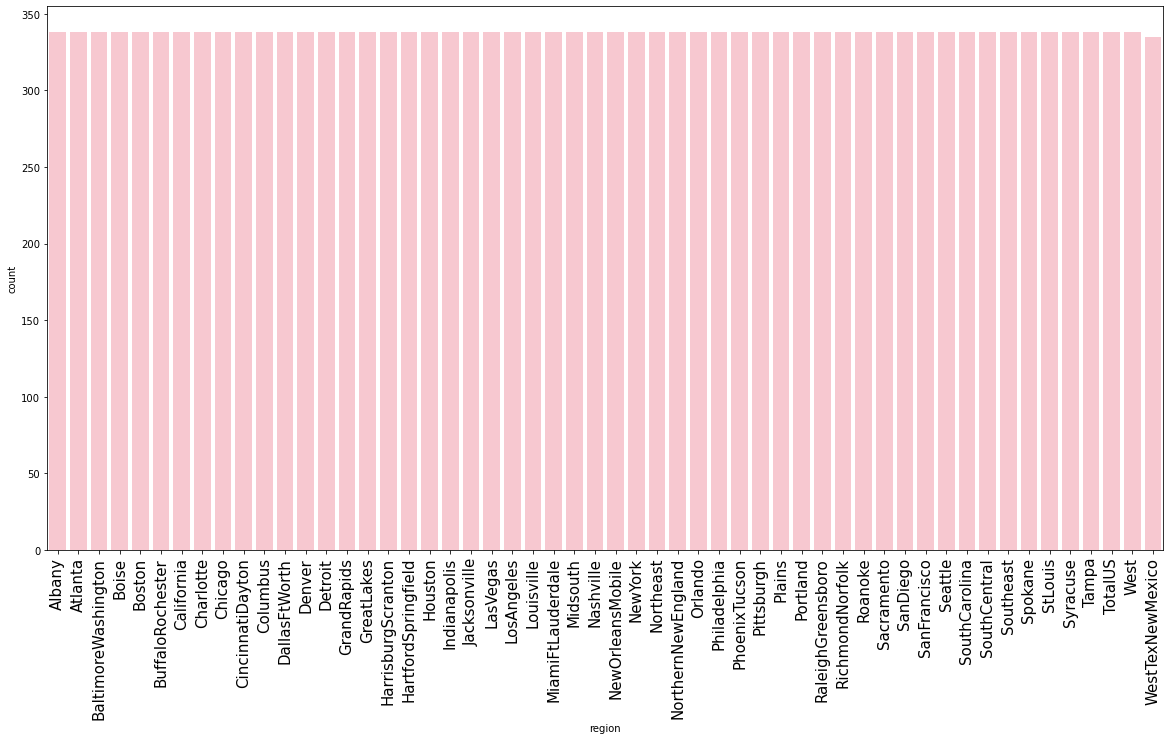

In [18]:
# Lets see grap of region, how

plt.figure(figsize=(20,10))
sns.countplot(Avocado.region, color = 'pink')
plt.xticks(rotation=90, fontsize = 15)
plt.show()

#### All regions have almost equal count

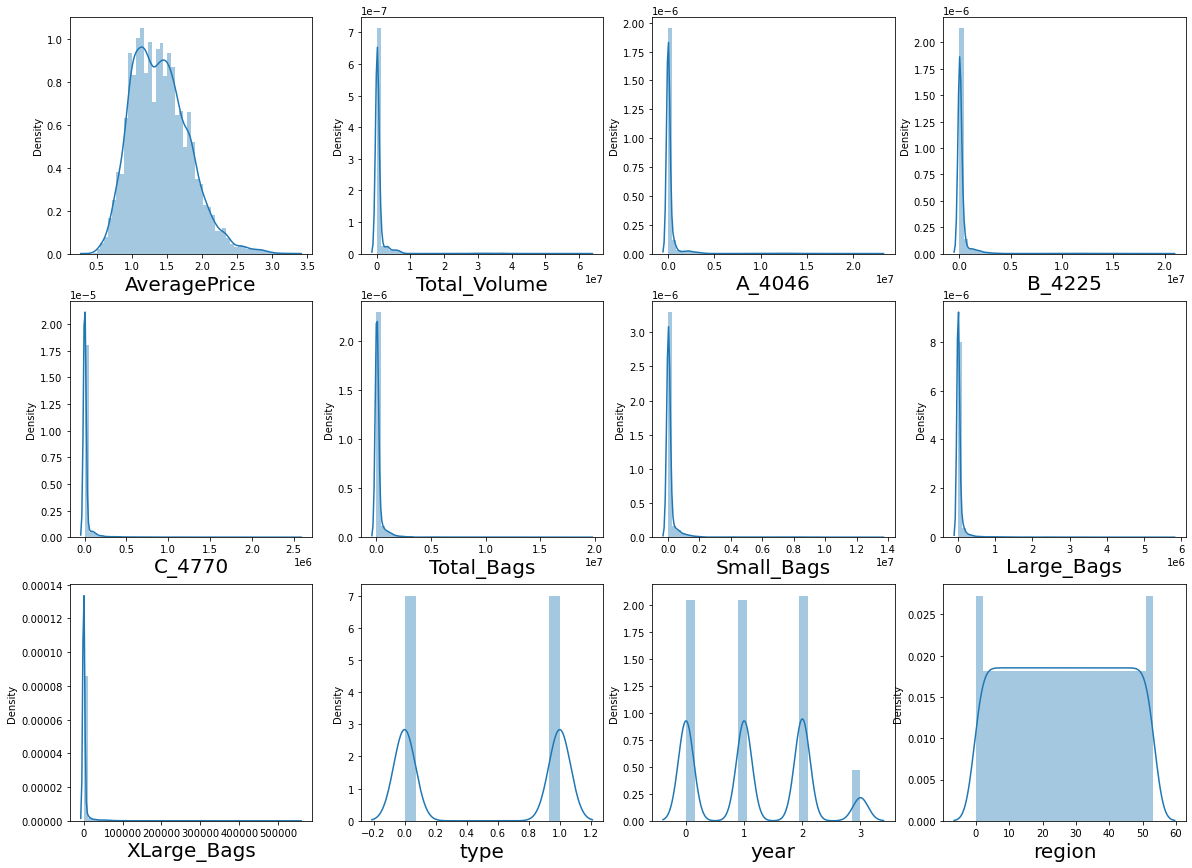

In [19]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

plt.figure(figsize = (20,20))
plotnumber = 1

for column in Avocado_new:
    if plotnumber <= 12: 
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot (Avocado_new[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

### Observations

1. Skweness is present in our data. (There are some still outliers present in some of the columns)
2. Also our data has no null values
3. Further need to check outliers in our data
4. We will first check the outlier and then viusuvalize our outlier data using boxplot

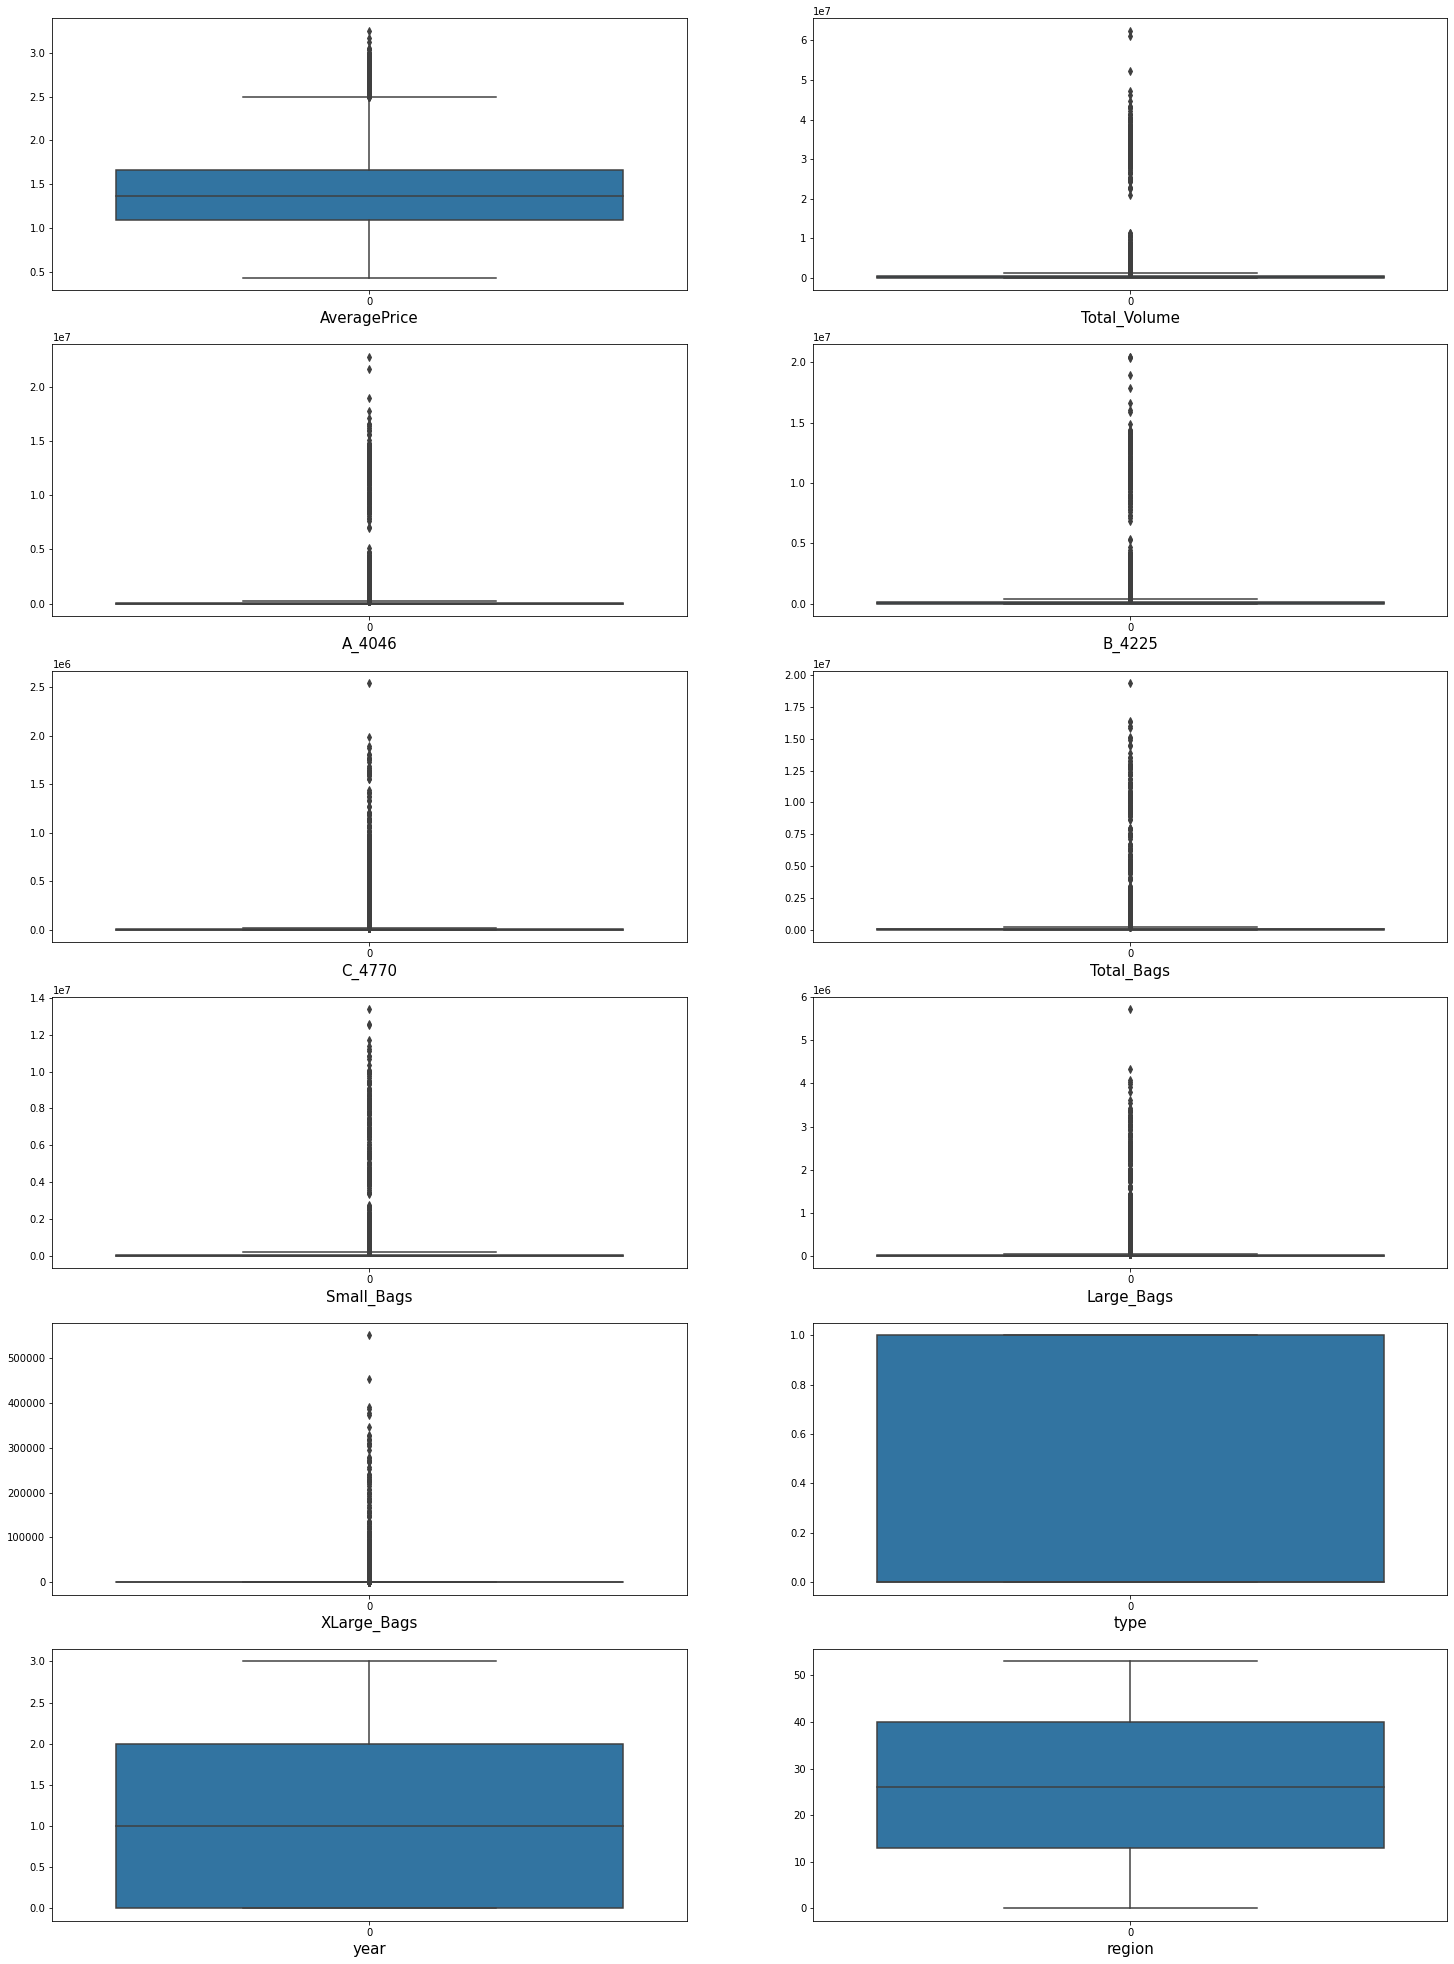

In [20]:
# Visualize the outliers using boxplot

plt.figure (figsize = (25,35))
graph = 1
for column in Avocado_new:
    if graph <= 12:
        plt.subplot(6,2, graph)
        ax = sns.boxplot (data = Avocado_new[column])
        plt.xlabel (column, fontsize = 15)
    graph +=1
plt.show ()

Observation:
   1. As outliers are bit overcrowded, we will firt check pairplot our dataset
   2. According to above grap except year, region and type all other columns have outliers
   3. Our data need more correction

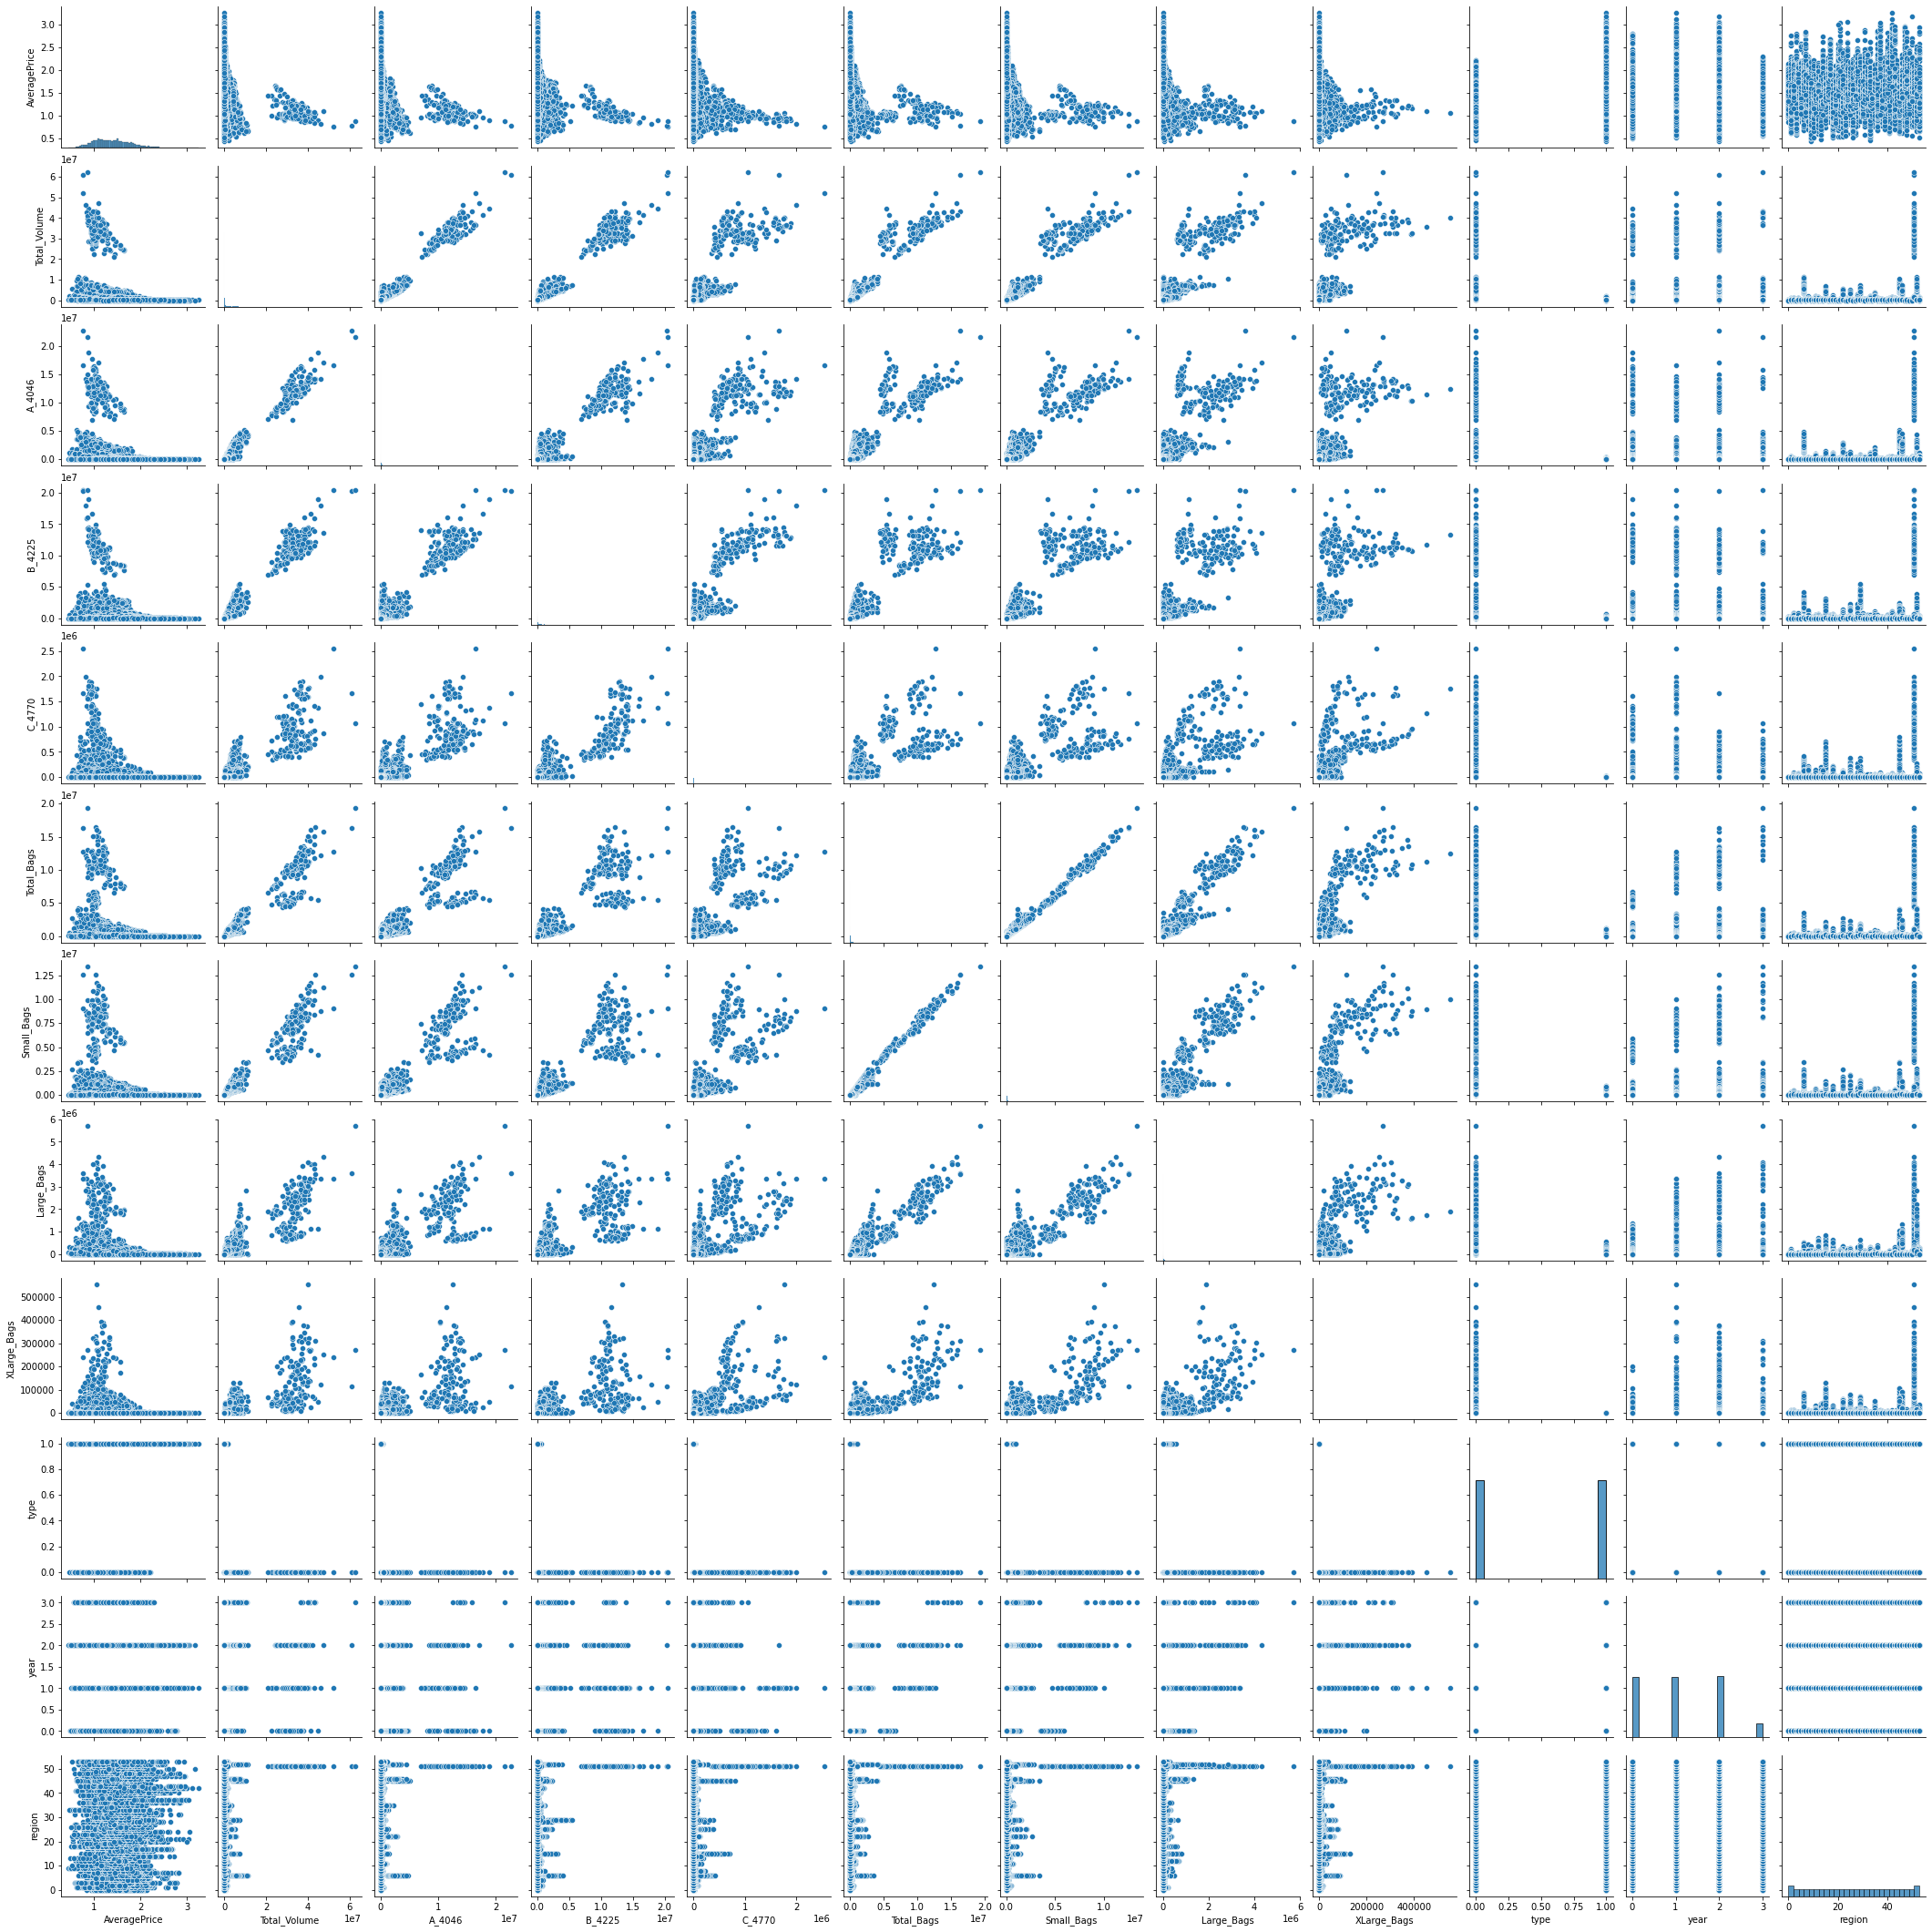

In [21]:
sns.pairplot(Avocado_new)

### Observation:
1. data have correlation with oters
2. Further need more clarification on this
3. We will do more data viusalization

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

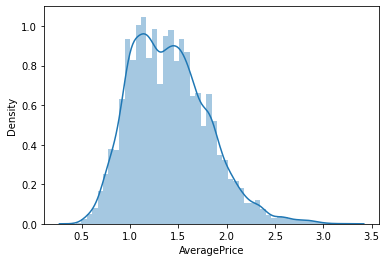

In [22]:
sns.distplot(Avocado_new ['AveragePrice'],hist=True)

#### Checked target column distribution

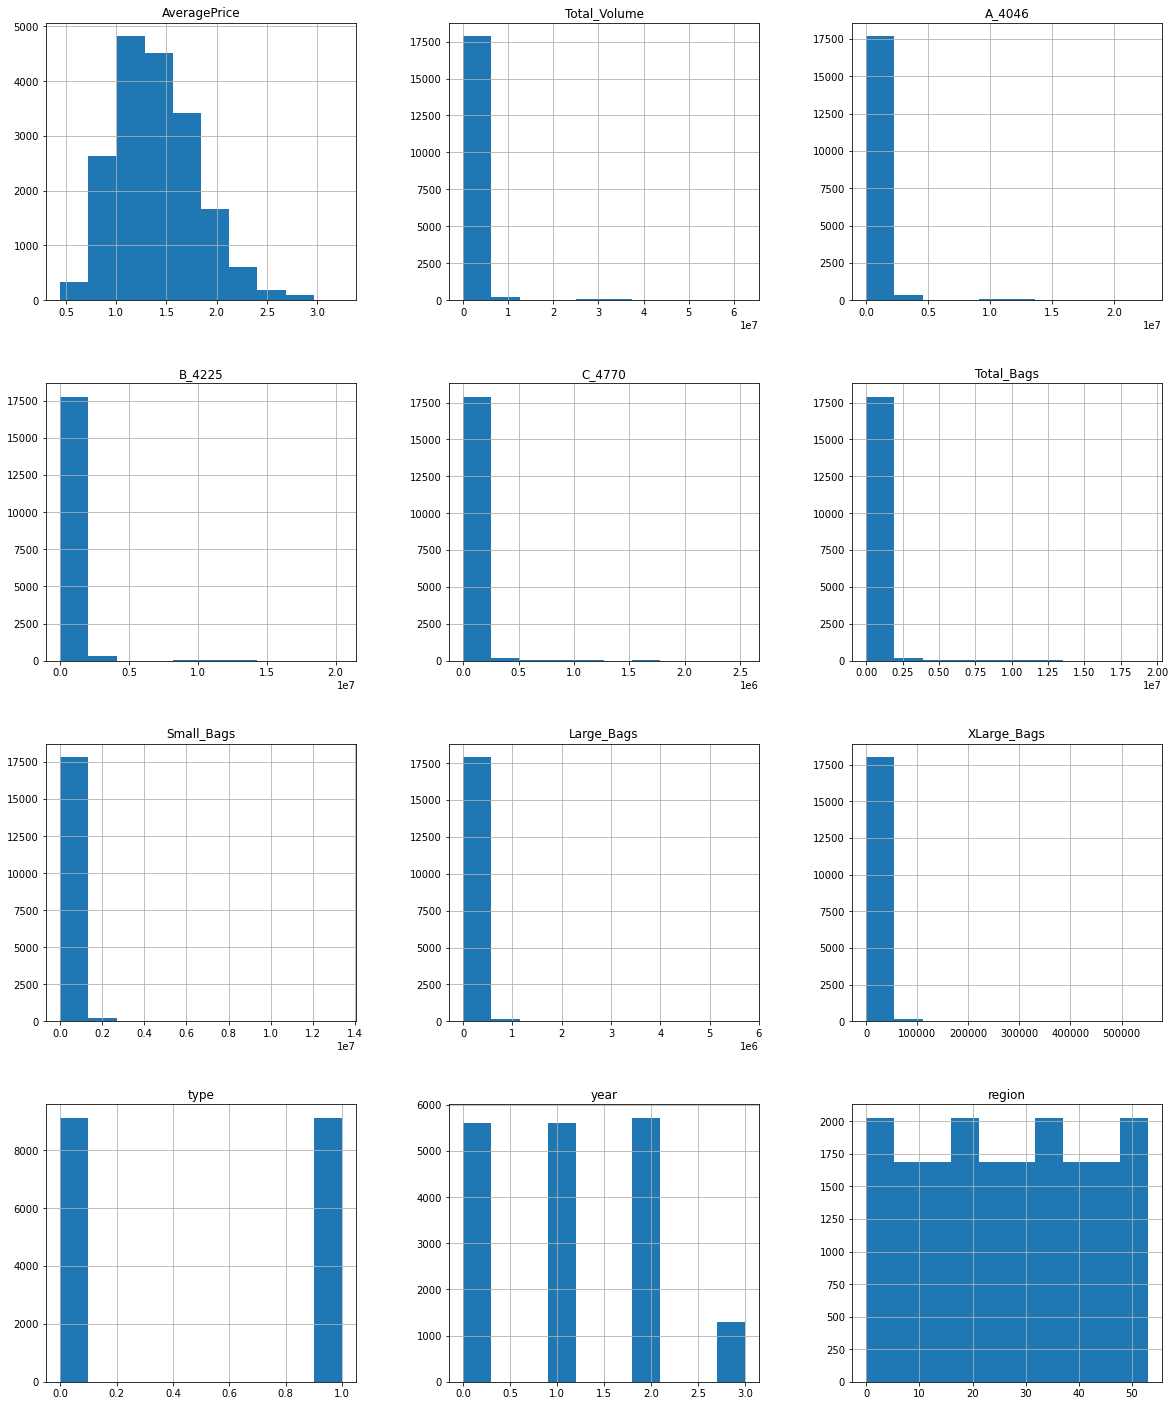

In [23]:
Avocado_new.hist(figsize=(20,25))
plt.show()

In [24]:
# Skweking dta

Avocado_new.skew()

AveragePrice     0.580303
Total_Volume     9.007687
A_4046           8.648220
B_4225           8.942466
C_4770          10.159396
Total_Bags       9.756072
Small_Bags       9.540660
Large_Bags       9.796455
XLarge_Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [25]:
skew=('Total_Volume','A_4046','B_4225','C_4770','Total_Bags','Small_Bags','Large_Bags','XLarge_Bags')
for col in skew :
    if Avocado_new.skew().loc[col]>0.55:
        Avocado_new[col]=np.log1p(Avocado_new[col])

In [26]:
Avocado_new.skew()

AveragePrice    0.580303
Total_Volume    0.088098
A_4046         -0.328195
B_4225         -0.486654
C_4770          0.099986
Total_Bags     -0.218874
Small_Bags     -0.622148
Large_Bags     -0.547765
XLarge_Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
dtype: float64

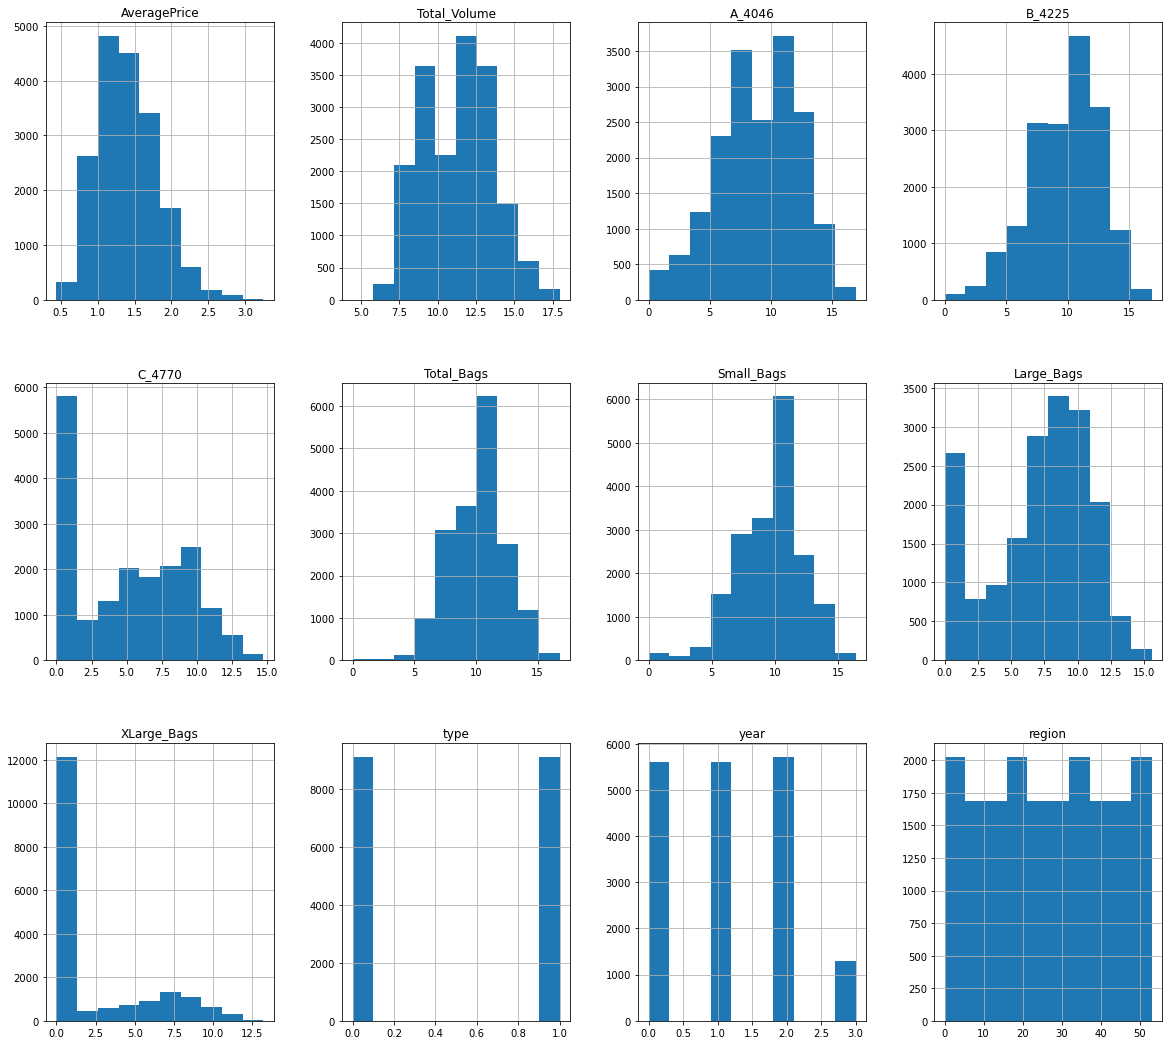

In [27]:
Avocado_new.hist(figsize=(20,25),layout=(4,4))
plt.show()

Observation:
1. Data looks much filled with skewed one.
2. There is change in bar as compaired to previous one.
3. Further we will check outliers using box plot
4. Accordingly need to remove further outliers if any

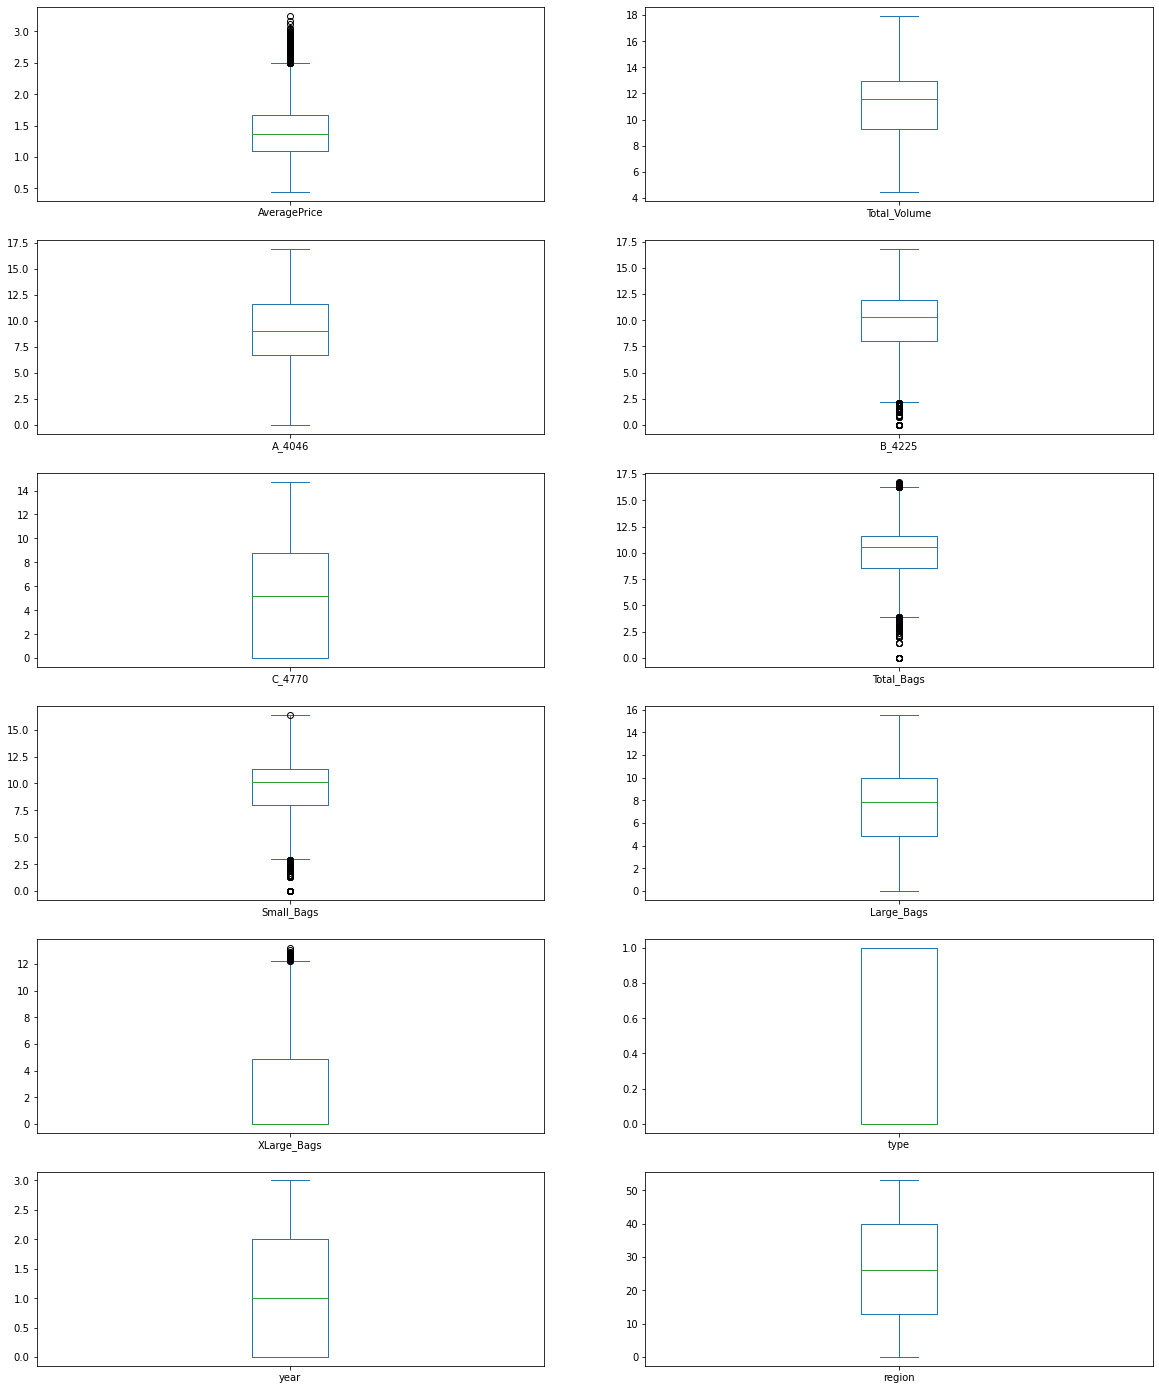

In [28]:
# checking outliers using boxplot

Avocado_new.plot(kind='box',subplots=True,layout=(6,2),figsize=(20,25))
plt.show()

Observation:
1. B_4225, Total_bags and small_bags have more outliers
2. X_large bags and average price have little outliers
3. We will further need to remove these outliers using IQR


In [29]:
# Find the IQR (inter quatile range) to identityfy outliers

# 1st Quantile
q1 = Avocado_new.quantile(0.25)

# 3rd Quantile 

q3 = Avocado_new.quantile (0.75)

#IQR (inter quantile range)

iqr = q3 - q1

In [30]:
print ('1st Quantile')
print ('-'* 20)
print (q1)
print ('-'* 50)
print('3rd Quantile')
print ('-'* 20)
print (q3)
print ('-'* 50)
print ('Inter quantile range')
print ('-'* 20)
print (iqr)

1st Quantile
--------------------
AveragePrice     1.100000
Total_Volume     9.290960
A_4046           6.751183
B_4225           8.009622
C_4770           0.000000
Total_Bags       8.534962
Small_Bags       7.955222
Large_Bags       4.855695
XLarge_Bags      0.000000
type             0.000000
year             0.000000
region          13.000000
Name: 0.25, dtype: float64
--------------------------------------------------
3rd Quantile
--------------------
AveragePrice     1.660000
Total_Volume    12.978408
A_4046          11.617476
B_4225          11.919775
C_4770           8.739444
Total_Bags      11.615341
Small_Bags      11.330668
Large_Bags      10.000172
XLarge_Bags      4.894101
type             1.000000
year             2.000000
region          40.000000
Name: 0.75, dtype: float64
--------------------------------------------------
Inter quantile range
--------------------
AveragePrice     0.560000
Total_Volume     3.687449
A_4046           4.866293
B_4225           3.910153
C_4770

In [31]:
# Validation 1 outlier

avp_high = (q3.AveragePrice + (1.5* iqr.AveragePrice))
avp_high

2.4999999999999996

In [32]:
# checking the indexes which have higher value

index_Y = np.where(Avocado_new['AveragePrice']>avp_high)
index_Y

(array([11314, 11320, 11321, 11322, 11323, 11324, 11325, 11326, 11327,
        11328, 11329, 11330, 11331, 11332, 12254, 12819, 12821, 12823,
        12824, 13033, 13035, 13037, 13038, 13395, 13657, 13661, 13813,
        14016, 14017, 14018, 14019, 14020, 14072, 14073, 14074, 14117,
        14118, 14119, 14120, 14121, 14122, 14123, 14124, 14125, 14126,
        14128, 14129, 14177, 14385, 14394, 14697, 14699, 14701, 14702,
        14806, 14807, 14808, 14809, 14810, 14811, 14812, 14911, 14912,
        14913, 14914, 14915, 14916, 14917, 14918, 14919, 15031, 15032,
        15033, 15034, 15036, 15077, 15124, 15125, 15126, 15127, 15128,
        15129, 15130, 15143, 15147, 15148, 15510, 15511, 15667, 15668,
        15669, 15671, 15672, 15673, 15674, 15675, 15676, 15680, 15684,
        15812, 15814, 15815, 15816, 15870, 15871, 16024, 16050, 16054,
        16055, 16395, 16399, 16421, 16660, 16661, 16662, 16663, 16664,
        16665, 16666, 16667, 16668, 16713, 16714, 16715, 16717, 16718,
      

In [33]:
# Droping the index which we found in the above cell

Avocado_new = Avocado_new.drop(Avocado_new.index[index_Y])
Avocado_new.shape

(18040, 12)

In [34]:
# After droping index we need to make sure that we rearrange the index.
# Rearranging index position

Avocado_new.reset_index()

,index,AveragePrice,Total_Volume,A_4046,B_4225,C_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0
1,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0
2,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0
3,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0
4,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18035,18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53
18036,18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53
18037,18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53
18038,18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53


In [35]:
tb_high = (q3.Total_Bags + (1.5* iqr.Total_Bags))
print (tb_high)
index = np.where(Avocado_new['Total_Bags']>tb_high)

Avocado_new = Avocado_new.drop(Avocado_new.index[index])
print (Avocado_new.shape)
Avocado_new.reset_index()

16.235908875715253
(17997, 12)


,index,AveragePrice,Total_Volume,A_4046,B_4225,C_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0
1,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0
2,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0
3,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0
4,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17992,18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53
17993,18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53
17994,18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53
17995,18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53


In [36]:
xbgs_high = (q3.XLarge_Bags + (1.5* iqr.XLarge_Bags))
print (xbgs_high)
index = np.where(Avocado_new['XLarge_Bags']>xbgs_high)

Avocado_new = Avocado_new.drop(Avocado_new.index[index])
print (Avocado_new.shape)
Avocado_new.reset_index()

12.235253694600761
(17982, 12)


,index,AveragePrice,Total_Volume,A_4046,B_4225,C_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0
1,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0
2,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0
3,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0
4,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17977,18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53
17978,18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53
17979,18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53
17980,18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53


In [37]:
B_high = (q1.B_4225 - (1.5* iqr.B_4225))
print (B_high)
lbpindex = np.where(Avocado_new['B_4225']<B_high)

Avocado_new = Avocado_new.drop(Avocado_new.index[index])
print (Avocado_new.shape)
Avocado_new.reset_index()

2.1443926426728197
(17967, 12)


,index,AveragePrice,Total_Volume,A_4046,B_4225,C_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0
1,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0
2,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0
3,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0
4,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17962,18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53
17963,18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53
17964,18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53
17965,18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53


In [38]:
tb_high = (q1.Total_Bags - (1.5* iqr.Total_Bags))
print (tb_high)
lbpindex = np.where(Avocado_new['Total_Bags']<tb_high)

Avocado_new = Avocado_new.drop(Avocado_new.index[index])
print (Avocado_new.shape)
Avocado_new.reset_index()

3.9143944827752994
(17952, 12)


,index,AveragePrice,Total_Volume,A_4046,B_4225,C_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0
1,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0
2,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0
3,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0
4,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17947,18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53
17948,18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53
17949,18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53
17950,18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53


In [39]:
sb_high = (q1.Small_Bags - (1.5* iqr.Small_Bags))
print (sb_high)
lbpindex = np.where(Avocado_new['Small_Bags']<sb_high)

Avocado_new = Avocado_new.drop(Avocado_new.index[index])
print (Avocado_new.shape)
Avocado_new.reset_index()

2.892052157876525
(17937, 12)


,index,AveragePrice,Total_Volume,A_4046,B_4225,C_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0
1,1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0
2,2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0
3,3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0
4,4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17932,18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53
17933,18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53
17934,18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53
17935,18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53


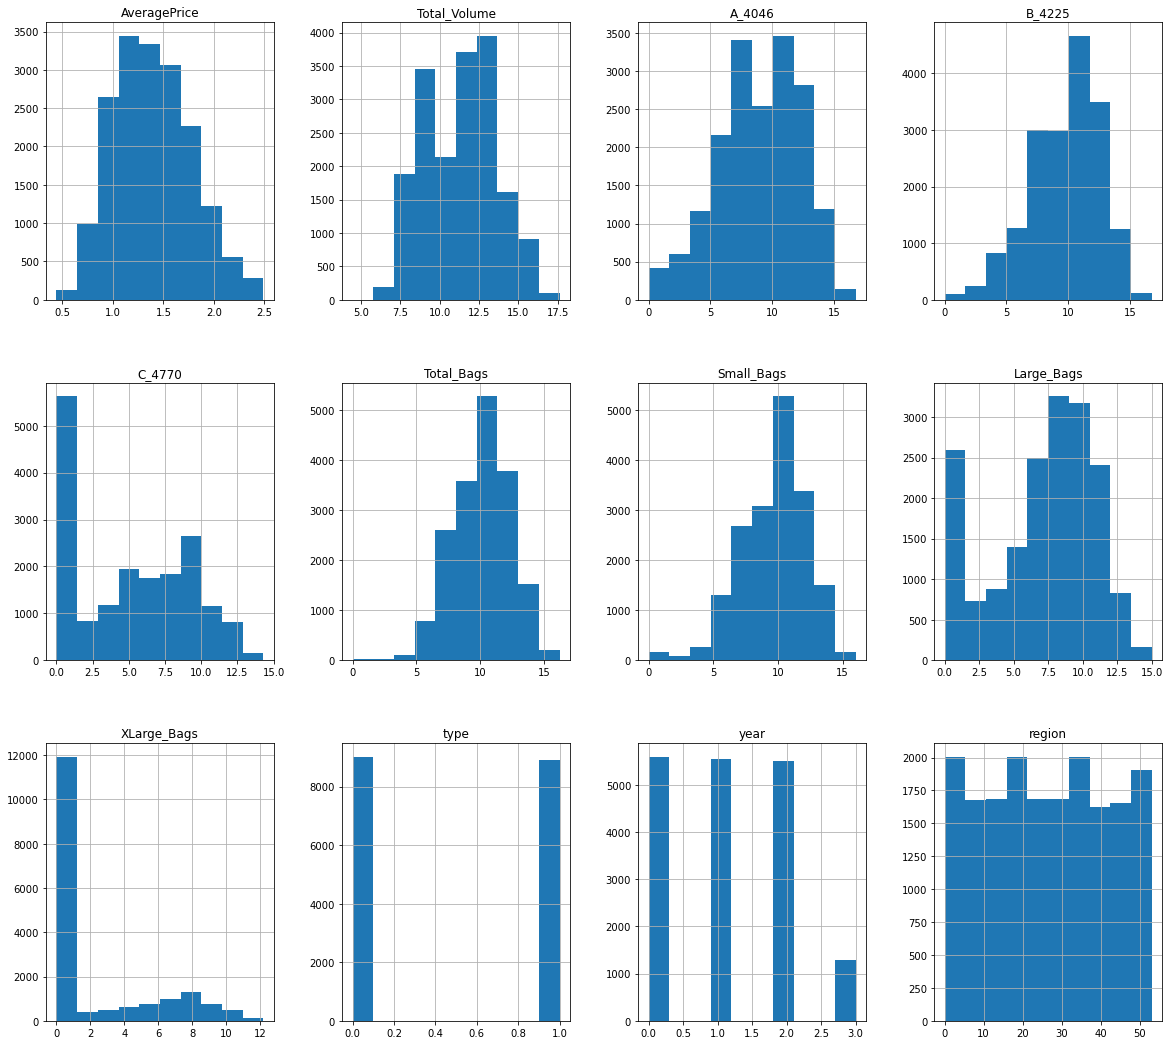

In [40]:
# Checking grapoical data after removing outliers
Avocado_new.hist(figsize=(20,25),layout=(4,4))
plt.show()

Observation:
1. We will further check how our data is distributed for each column using distplot
2. After removing skness and outlier our data much have been chagned

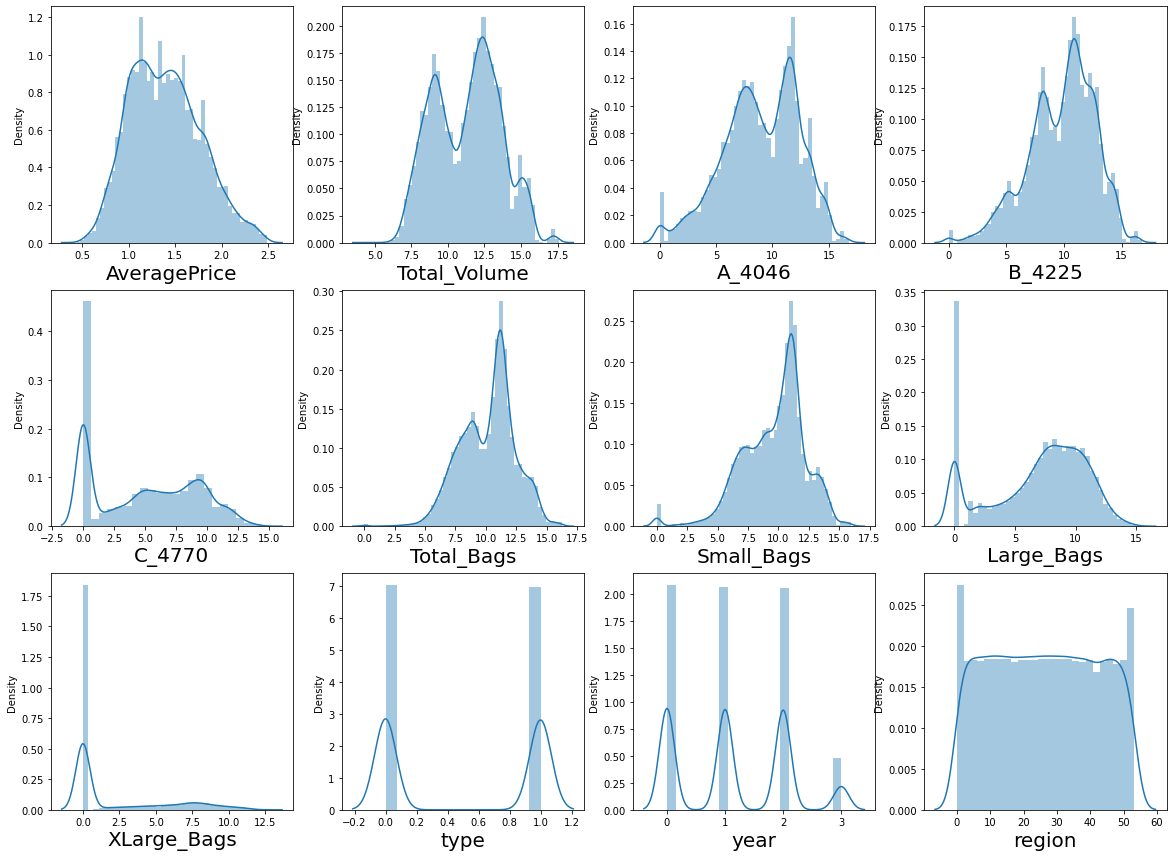

In [41]:
# lETS SEE HOW DATA IS DISTRIBUTED FOR EVERY COLUMN

plt.figure(figsize = (20,20))
plotnumber = 1

for column in Avocado_new:
    if plotnumber <= 12: 
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot (Avocado_new[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

Observation
After check once again there seems to be little change in skwness which is bit correct in terms

### DATA Visulization

Sales (in Million $): year
0    61931.579744
1    62685.780398
2    63266.458770
3    14976.488915
Name: Total_Volume, dtype: float64


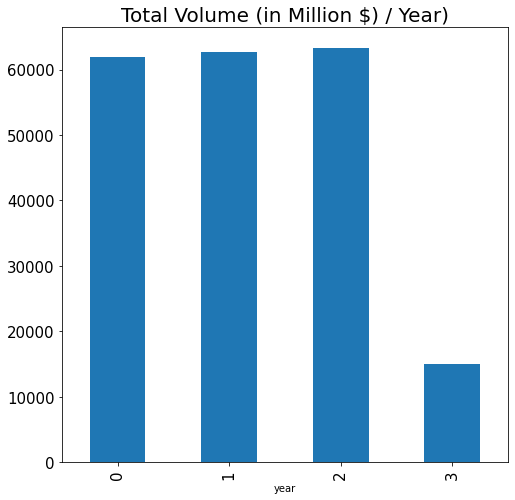

In [76]:
A = plt.subplots(1,figsize=(10,10))
Avocado_new.groupby(['year'])['Total_Volume'].sum().plot(kind='bar', figsize=(8,8), fontsize=15)
plt.title('Total Volume (in Million $) / Year)', fontsize = 20)
print('Sales (in Million $):',(Avocado_new.groupby(['year'])['Total_Volume'].sum()))

Observation
1. Sale of avocado is decreasing, it was constant in first 3 years. (2015,2016 and 2017)
2. Most sale was in 2017 and least is in 2018
3. Sale is 2018 has been reduced drastically

Average Price(in $): year
0    1.372235
1    1.330976
2    1.485842
3    1.350218
Name: AveragePrice, dtype: float64


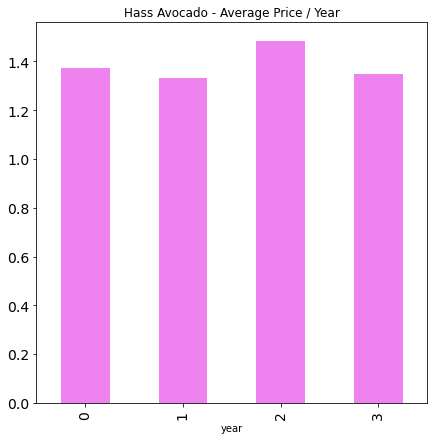

In [43]:
B = plt.subplots(1,figsize=(10,10))
Avocado_new.groupby(['year'])['AveragePrice'].mean().plot(kind='bar', figsize=(7,7), fontsize=14, color='violet')
plt.title('Hass Avocado - Average Price / Year')
print('Average Price(in $):',Avocado_new.groupby(['year'])['AveragePrice'].mean())

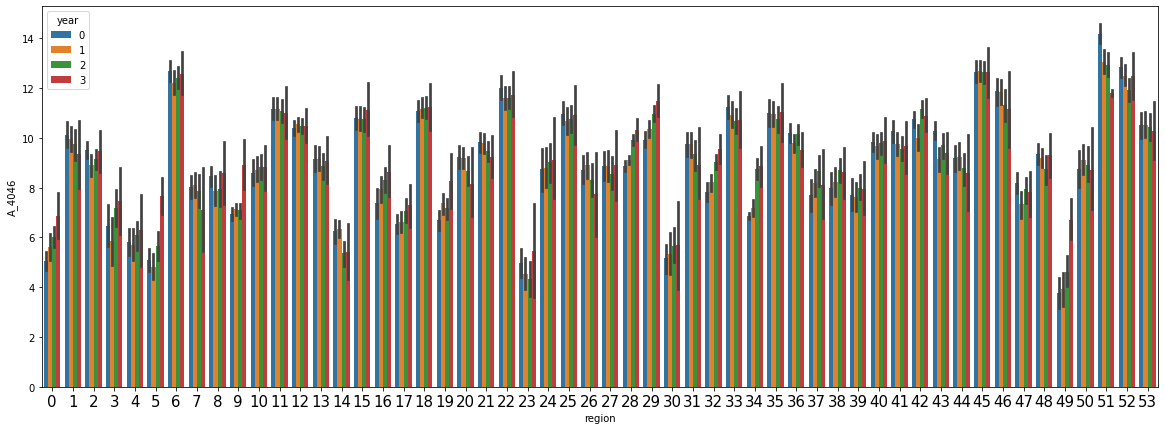

In [44]:
plt.figure(figsize=(20,7))
sns.barplot(x='region',y='A_4046',data=Avocado_new, hue = 'year')
plt.xticks(fontsize = 15)
plt.show()

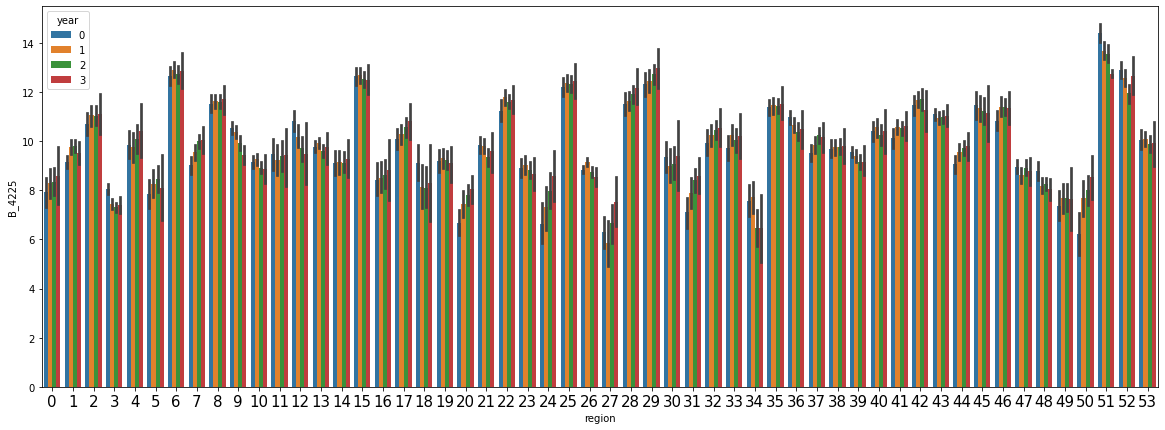

In [45]:
plt.figure(figsize=(20,7))
sns.barplot(x='region',y='B_4225',data=Avocado_new, hue = 'year')
plt.xticks(fontsize = 15)
plt.show()

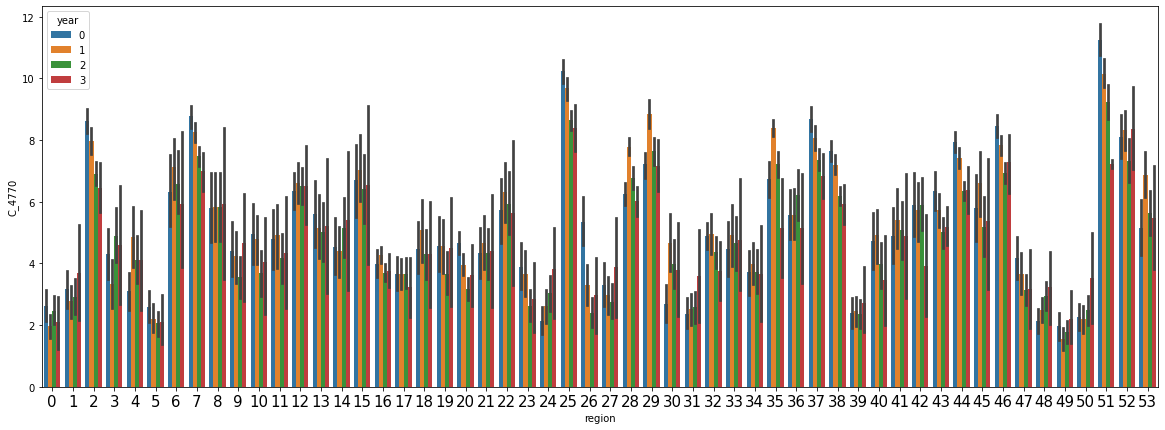

In [46]:
plt.figure(figsize=(20,7))
sns.barplot(x='region',y='C_4770',data=Avocado_new, hue = 'year')
plt.xticks(fontsize = 15)
plt.show()

OBSERVATION: 
    
1. Above we have are visulizing region vise data for all 3 products
2. Louisville has largest number for each product.
3. Similar frequency has been carried out by MiamiFtLauderdale and WestTexNewMexico for each product.
4. Sale of C_4770 is less as compare to other 2
5. A_4040 has most number of sale amount all 3.

<Figure size 1080x720 with 0 Axes>

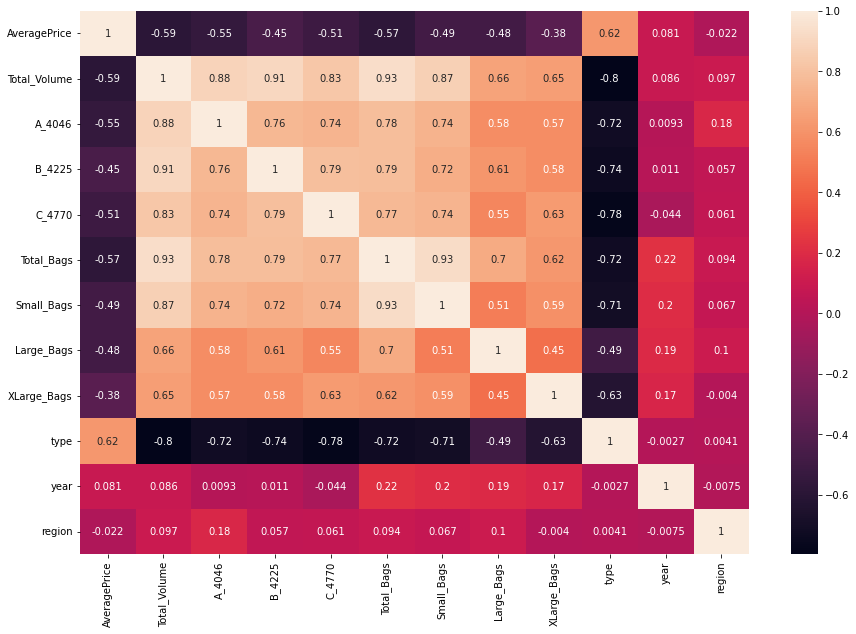

<Figure size 1080x720 with 0 Axes>

In [47]:
Avocado_new.corr()
plt.figure(figsize=(15,10))
sns.heatmap(Avocado_new.corr(), annot=True);plt.figure(figsize=(15,10))

Observation:
1. our above heatmap show marojity of the colums are correlated with each other.
2. Most correlation is viewed between bags and products also
3. Region have least impact with other columns

Assigning data to X and Y

In [48]:
X = Avocado_new.drop(columns='AveragePrice', axis = 1)
Y = Avocado_new ['AveragePrice']
print (X)

       Total_Volume    A_4046     B_4225    C_4770  Total_Bags  Small_Bags  \
0         11.070344  6.944801  10.905146  3.895080    9.070833    9.060055   
1         10.912867  6.515127  10.706381  4.083115    9.159737    9.149429   
2         11.680313  6.679222  11.600485  4.879007    9.005325    8.992584   
3         11.277116  7.032624  11.184108  4.298373    8.667708    8.644425   
4         10.840377  6.848515  10.688288  4.340944    8.729874    8.697389   
...             ...       ...        ...       ...         ...         ...   
18244      9.745419  7.624599   7.333154  0.000000    9.510421    9.477908   
18245      9.538855  7.083975   8.141044  0.000000    9.134090    9.098407   
18246      9.530085  7.084159   7.805389  6.591591    9.147945    9.143431   
18247      9.693150  7.332127   8.000363  6.590315    9.302969    9.298401   
18248      9.769418  7.971006   7.765200  5.418453    9.393924    9.391757   

       Large_Bags  XLarge_Bags  type  year  region  
0        4

In [49]:
print (Y)

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17937, dtype: float64


In [50]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
X=sc.fit_transform(X)

In [51]:
pd.DataFrame(X).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

### Spliting data into training and testing data (X and Y)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.2, random_state=3)

In [53]:
# Checking shape of train test and split data

print (X.shape, X_train.shape, X_test.shape)

(17937, 11) (14349, 11) (3588, 11)


# Model Selection

### Linear Regression

In [54]:
regressor = LinearRegression ()

In [55]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [56]:
training_data_prediction = regressor.predict(X_train)

R Squared

In [57]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print ('R Squared value: ', r2_train)

R Squared value:  0.5210446976635408


In [58]:
# Prediction on test data

training_data_prediction = regressor.predict(X_test)

In [59]:
# R-Squared value on test data

r2_train = metrics.r2_score(Y_test, training_data_prediction)
print ('R Squared value: ', r2_train)

R Squared value:  0.534995765892553


### Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train,Y_train)

print(RF.score (X_train,Y_train))
RF_PRED = RF. predict(X_train)
print ('========')

0.9786396366107197


### Decesion Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor


DTR = DecisionTreeRegressor()

DTR.fit(X_train,Y_train)

print(DTR.score(X_train,Y_train))

DTR_PRED=DTR.predict(X_test)

1.0


Our data is giveing literall 100 percentage of accuracy, which is doubtfull.
We will further need to check if our data is overfitted and accordingly need t check for the accurate model using gridsearhcv

### HYPER PERAMETER TUNING

#### GridSearchCV

In [72]:
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.metrics import r2_score

In [63]:
RF = RandomForestRegressor()

param ={
       'n_estimators':[100,200],
      'criterion':['mse','mae'],
     'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [64]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [65]:
RF_grid.fit(X_train,Y_train)
RF_grid_PRED=RF_grid.best_estimator_.predict(X_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [66]:
RF_grid.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [73]:
print('MSE:',mean_squared_error(RF_grid_PRED,Y_test))
print('MAE:',mean_absolute_error(RF_grid_PRED,Y_test))
print('r2_score:',r2_score(RF_grid_PRED,Y_test))

MSE: 0.020025881315496097
MAE: 0.10063885172798215
r2_score: 0.8242000406250065



Random forest is the best model, we have used grid search cv to corret the data and finally decided with all other parameters.



### Saving model

In [74]:
import joblib

In [75]:
joblib.dump(RF_grid.best_estimator_,'Avocado.obj')

['Avocado.obj']